In [1]:
#Imports 
import numpy as np
import torch
import torch.nn as  nn
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import PIL.Image as image


In [2]:
#We Set our tranforms
my_transform = transforms.Compose([transforms.Resize((224,224)),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485,0.456,406], [0.229,0.224,0.225])
                                 ])

In [4]:
#Loading our Data
#Due to the small nature of the dataset we will only train the model using the train data
train_data = datasets.ImageFolder(root = 'C:/Users/user pc/Desktop/ML_DEEP/DEEP/Concrete Images/Concrete Crack Images for Classification', transform = my_transform)
test_data = datasets.ImageFolder(root = 'C:/Users/user pc/Desktop/ML_DEEP/DEEP/Concrete Images/Concrete Test', transform = my_transform)

In [5]:
#Load our data using the DataLoader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [4]:
#Our Concrete Image Classification Model

class ConcreteConv(nn.Module):
    def __init__(self):
        super(ConcreteConv,self).__init__()
        self.Con1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.Con2 = nn.Conv2d(6, 16, 5)
        self.FC1 = nn.Linear(16*53*53, 120)
        self.FC2 = nn.Linear(120, 84)
        self.FC3 = nn.Linear(84, 2)
        
    def forward(self,x):
        x = self.Con1(x)
        x = self.pool(x)
        x = self.Con2(x)
        x = self.pool(x)
        x = x.view(-1, 16*53*53)
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.FC3(x)
        
        return x
        

In [5]:
#Our Model Parameters
device = ('cuda' if torch.cuda.is_available() else 'cpu')

model = ConcreteConv().to(device)
our_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [10]:
#Our Concrete model Training

num_epochs = 2
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        #our Forward Pass
        outputs = model(images)
        loss = our_loss(outputs, labels)
        
        #Our Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Training Information
        print(f'epoch [{epoch+1}/{num_epochs}] step[{i+1}/{n_total_steps}] loss{loss.item():.4f}')
print("Our Model Is Trained")

epoch [1/2] step[1/1063] loss567.2729
epoch [1/2] step[2/1063] loss6601.3701
epoch [1/2] step[3/1063] loss7414.3672
epoch [1/2] step[4/1063] loss3897.2024
epoch [1/2] step[5/1063] loss1490.0420
epoch [1/2] step[6/1063] loss3136.4299
epoch [1/2] step[7/1063] loss1951.2899
epoch [1/2] step[8/1063] loss172.5877
epoch [1/2] step[9/1063] loss1431.0348
epoch [1/2] step[10/1063] loss2915.5425
epoch [1/2] step[11/1063] loss1902.1327
epoch [1/2] step[12/1063] loss2799.6516
epoch [1/2] step[13/1063] loss1255.9510
epoch [1/2] step[14/1063] loss827.4315
epoch [1/2] step[15/1063] loss162.5919
epoch [1/2] step[16/1063] loss151.6234
epoch [1/2] step[17/1063] loss395.2074
epoch [1/2] step[18/1063] loss433.5959
epoch [1/2] step[19/1063] loss307.3766
epoch [1/2] step[20/1063] loss81.3131
epoch [1/2] step[21/1063] loss244.8728
epoch [1/2] step[22/1063] loss333.5457
epoch [1/2] step[23/1063] loss238.0282
epoch [1/2] step[24/1063] loss322.5324
epoch [1/2] step[25/1063] loss275.3066
epoch [1/2] step[26/1063

epoch [1/2] step[218/1063] loss0.6651
epoch [1/2] step[219/1063] loss0.6471
epoch [1/2] step[220/1063] loss0.6563
epoch [1/2] step[221/1063] loss0.6736
epoch [1/2] step[222/1063] loss0.6355
epoch [1/2] step[223/1063] loss0.6764
epoch [1/2] step[224/1063] loss0.6642
epoch [1/2] step[225/1063] loss0.6434
epoch [1/2] step[226/1063] loss0.6667
epoch [1/2] step[227/1063] loss0.6985
epoch [1/2] step[228/1063] loss0.6671
epoch [1/2] step[229/1063] loss0.6212
epoch [1/2] step[230/1063] loss0.6581
epoch [1/2] step[231/1063] loss0.6026
epoch [1/2] step[232/1063] loss0.7524
epoch [1/2] step[233/1063] loss0.7209
epoch [1/2] step[234/1063] loss0.7092
epoch [1/2] step[235/1063] loss0.7072
epoch [1/2] step[236/1063] loss0.6837
epoch [1/2] step[237/1063] loss0.6338
epoch [1/2] step[238/1063] loss0.6354
epoch [1/2] step[239/1063] loss0.6077
epoch [1/2] step[240/1063] loss0.6609
epoch [1/2] step[241/1063] loss0.6466
epoch [1/2] step[242/1063] loss0.6177
epoch [1/2] step[243/1063] loss0.6710
epoch [1/2] 

epoch [1/2] step[434/1063] loss0.6195
epoch [1/2] step[435/1063] loss0.6678
epoch [1/2] step[436/1063] loss0.7106
epoch [1/2] step[437/1063] loss0.6300
epoch [1/2] step[438/1063] loss0.6188
epoch [1/2] step[439/1063] loss0.6121
epoch [1/2] step[440/1063] loss0.6005
epoch [1/2] step[441/1063] loss0.5759
epoch [1/2] step[442/1063] loss0.5981
epoch [1/2] step[443/1063] loss0.6096
epoch [1/2] step[444/1063] loss0.5716
epoch [1/2] step[445/1063] loss0.6068
epoch [1/2] step[446/1063] loss0.6205
epoch [1/2] step[447/1063] loss0.5775
epoch [1/2] step[448/1063] loss0.6213
epoch [1/2] step[449/1063] loss0.6118
epoch [1/2] step[450/1063] loss0.6097
epoch [1/2] step[451/1063] loss0.7102
epoch [1/2] step[452/1063] loss0.6286
epoch [1/2] step[453/1063] loss0.6485
epoch [1/2] step[454/1063] loss0.5318
epoch [1/2] step[455/1063] loss0.6163
epoch [1/2] step[456/1063] loss0.7840
epoch [1/2] step[457/1063] loss0.7413
epoch [1/2] step[458/1063] loss0.6077
epoch [1/2] step[459/1063] loss0.7269
epoch [1/2] 

epoch [1/2] step[650/1063] loss0.5324
epoch [1/2] step[651/1063] loss0.5508
epoch [1/2] step[652/1063] loss0.6439
epoch [1/2] step[653/1063] loss0.5878
epoch [1/2] step[654/1063] loss0.4832
epoch [1/2] step[655/1063] loss0.4934
epoch [1/2] step[656/1063] loss0.5057
epoch [1/2] step[657/1063] loss0.4962
epoch [1/2] step[658/1063] loss0.6157
epoch [1/2] step[659/1063] loss0.5254
epoch [1/2] step[660/1063] loss0.5613
epoch [1/2] step[661/1063] loss0.5257
epoch [1/2] step[662/1063] loss0.4586
epoch [1/2] step[663/1063] loss0.4506
epoch [1/2] step[664/1063] loss0.5249
epoch [1/2] step[665/1063] loss0.5494
epoch [1/2] step[666/1063] loss0.5207
epoch [1/2] step[667/1063] loss0.4279
epoch [1/2] step[668/1063] loss0.6513
epoch [1/2] step[669/1063] loss0.6131
epoch [1/2] step[670/1063] loss0.5292
epoch [1/2] step[671/1063] loss0.5139
epoch [1/2] step[672/1063] loss0.4905
epoch [1/2] step[673/1063] loss0.7810
epoch [1/2] step[674/1063] loss0.4563
epoch [1/2] step[675/1063] loss0.4736
epoch [1/2] 

epoch [1/2] step[866/1063] loss0.3345
epoch [1/2] step[867/1063] loss0.4218
epoch [1/2] step[868/1063] loss0.4197
epoch [1/2] step[869/1063] loss0.4532
epoch [1/2] step[870/1063] loss0.4293
epoch [1/2] step[871/1063] loss0.4819
epoch [1/2] step[872/1063] loss0.3935
epoch [1/2] step[873/1063] loss0.4793
epoch [1/2] step[874/1063] loss0.4121
epoch [1/2] step[875/1063] loss0.3245
epoch [1/2] step[876/1063] loss0.3256
epoch [1/2] step[877/1063] loss0.4888
epoch [1/2] step[878/1063] loss0.3601
epoch [1/2] step[879/1063] loss0.2575
epoch [1/2] step[880/1063] loss0.5047
epoch [1/2] step[881/1063] loss0.4074
epoch [1/2] step[882/1063] loss0.5593
epoch [1/2] step[883/1063] loss0.4612
epoch [1/2] step[884/1063] loss0.5778
epoch [1/2] step[885/1063] loss0.3234
epoch [1/2] step[886/1063] loss0.3633
epoch [1/2] step[887/1063] loss0.5350
epoch [1/2] step[888/1063] loss0.5120
epoch [1/2] step[889/1063] loss0.4654
epoch [1/2] step[890/1063] loss0.3753
epoch [1/2] step[891/1063] loss0.4106
epoch [1/2] 

epoch [2/2] step[18/1063] loss0.4259
epoch [2/2] step[19/1063] loss0.2906
epoch [2/2] step[20/1063] loss0.3828
epoch [2/2] step[21/1063] loss0.3450
epoch [2/2] step[22/1063] loss0.3761
epoch [2/2] step[23/1063] loss0.2556
epoch [2/2] step[24/1063] loss0.3072
epoch [2/2] step[25/1063] loss0.3942
epoch [2/2] step[26/1063] loss0.3353
epoch [2/2] step[27/1063] loss0.6439
epoch [2/2] step[28/1063] loss0.4339
epoch [2/2] step[29/1063] loss0.3013
epoch [2/2] step[30/1063] loss0.3534
epoch [2/2] step[31/1063] loss0.3851
epoch [2/2] step[32/1063] loss0.2050
epoch [2/2] step[33/1063] loss0.3128
epoch [2/2] step[34/1063] loss0.6287
epoch [2/2] step[35/1063] loss0.5181
epoch [2/2] step[36/1063] loss0.3748
epoch [2/2] step[37/1063] loss0.3535
epoch [2/2] step[38/1063] loss0.3827
epoch [2/2] step[39/1063] loss0.3896
epoch [2/2] step[40/1063] loss0.4846
epoch [2/2] step[41/1063] loss0.3522
epoch [2/2] step[42/1063] loss0.3106
epoch [2/2] step[43/1063] loss0.2522
epoch [2/2] step[44/1063] loss0.5521
e

epoch [2/2] step[236/1063] loss0.3443
epoch [2/2] step[237/1063] loss0.2510
epoch [2/2] step[238/1063] loss0.3282
epoch [2/2] step[239/1063] loss0.3794
epoch [2/2] step[240/1063] loss0.3902
epoch [2/2] step[241/1063] loss0.3076
epoch [2/2] step[242/1063] loss0.2546
epoch [2/2] step[243/1063] loss0.2964
epoch [2/2] step[244/1063] loss0.4127
epoch [2/2] step[245/1063] loss0.3354
epoch [2/2] step[246/1063] loss0.3215
epoch [2/2] step[247/1063] loss0.4144
epoch [2/2] step[248/1063] loss0.3330
epoch [2/2] step[249/1063] loss0.4066
epoch [2/2] step[250/1063] loss0.4580
epoch [2/2] step[251/1063] loss0.2633
epoch [2/2] step[252/1063] loss0.2242
epoch [2/2] step[253/1063] loss0.2586
epoch [2/2] step[254/1063] loss0.1985
epoch [2/2] step[255/1063] loss0.2545
epoch [2/2] step[256/1063] loss0.3758
epoch [2/2] step[257/1063] loss0.3565
epoch [2/2] step[258/1063] loss0.4248
epoch [2/2] step[259/1063] loss0.2738
epoch [2/2] step[260/1063] loss0.2625
epoch [2/2] step[261/1063] loss0.2419
epoch [2/2] 

epoch [2/2] step[452/1063] loss0.2967
epoch [2/2] step[453/1063] loss0.2497
epoch [2/2] step[454/1063] loss0.2989
epoch [2/2] step[455/1063] loss0.3652
epoch [2/2] step[456/1063] loss0.1931
epoch [2/2] step[457/1063] loss0.3775
epoch [2/2] step[458/1063] loss0.2115
epoch [2/2] step[459/1063] loss0.2715
epoch [2/2] step[460/1063] loss0.3487
epoch [2/2] step[461/1063] loss0.3264
epoch [2/2] step[462/1063] loss0.3732
epoch [2/2] step[463/1063] loss0.4553
epoch [2/2] step[464/1063] loss0.3016
epoch [2/2] step[465/1063] loss0.5558
epoch [2/2] step[466/1063] loss0.2005
epoch [2/2] step[467/1063] loss0.3197
epoch [2/2] step[468/1063] loss0.5020
epoch [2/2] step[469/1063] loss0.4068
epoch [2/2] step[470/1063] loss0.3852
epoch [2/2] step[471/1063] loss0.4274
epoch [2/2] step[472/1063] loss0.3888
epoch [2/2] step[473/1063] loss0.3368
epoch [2/2] step[474/1063] loss0.1834
epoch [2/2] step[475/1063] loss0.1213
epoch [2/2] step[476/1063] loss0.1449
epoch [2/2] step[477/1063] loss0.3917
epoch [2/2] 

epoch [2/2] step[668/1063] loss0.2099
epoch [2/2] step[669/1063] loss0.2914
epoch [2/2] step[670/1063] loss0.3573
epoch [2/2] step[671/1063] loss0.2369
epoch [2/2] step[672/1063] loss0.2961
epoch [2/2] step[673/1063] loss0.3628
epoch [2/2] step[674/1063] loss0.2392
epoch [2/2] step[675/1063] loss0.2249
epoch [2/2] step[676/1063] loss0.1769
epoch [2/2] step[677/1063] loss0.3705
epoch [2/2] step[678/1063] loss0.4936
epoch [2/2] step[679/1063] loss0.2350
epoch [2/2] step[680/1063] loss0.2178
epoch [2/2] step[681/1063] loss0.2871
epoch [2/2] step[682/1063] loss0.2719
epoch [2/2] step[683/1063] loss0.2928
epoch [2/2] step[684/1063] loss0.2025
epoch [2/2] step[685/1063] loss0.2834
epoch [2/2] step[686/1063] loss0.2152
epoch [2/2] step[687/1063] loss0.7717
epoch [2/2] step[688/1063] loss0.4448
epoch [2/2] step[689/1063] loss0.4868
epoch [2/2] step[690/1063] loss0.4114
epoch [2/2] step[691/1063] loss0.3365
epoch [2/2] step[692/1063] loss0.4368
epoch [2/2] step[693/1063] loss0.3042
epoch [2/2] 

epoch [2/2] step[884/1063] loss0.3217
epoch [2/2] step[885/1063] loss0.2649
epoch [2/2] step[886/1063] loss0.5032
epoch [2/2] step[887/1063] loss0.1045
epoch [2/2] step[888/1063] loss0.1941
epoch [2/2] step[889/1063] loss0.1812
epoch [2/2] step[890/1063] loss0.5393
epoch [2/2] step[891/1063] loss0.3440
epoch [2/2] step[892/1063] loss0.1250
epoch [2/2] step[893/1063] loss0.1602
epoch [2/2] step[894/1063] loss0.2491
epoch [2/2] step[895/1063] loss0.1698
epoch [2/2] step[896/1063] loss0.0672
epoch [2/2] step[897/1063] loss0.2858
epoch [2/2] step[898/1063] loss0.2700
epoch [2/2] step[899/1063] loss0.6540
epoch [2/2] step[900/1063] loss0.1719
epoch [2/2] step[901/1063] loss0.4259
epoch [2/2] step[902/1063] loss0.5499
epoch [2/2] step[903/1063] loss0.3769
epoch [2/2] step[904/1063] loss0.3600
epoch [2/2] step[905/1063] loss0.3095
epoch [2/2] step[906/1063] loss0.3688
epoch [2/2] step[907/1063] loss0.2321
epoch [2/2] step[908/1063] loss0.3843
epoch [2/2] step[909/1063] loss0.1241
epoch [2/2] 

In [11]:
#Model Evaluation on the test data
correct = 0
total = 0

with torch.no_grad():
    model.eval()
    for i, (images, labels) in enumerate(test_loader):
        outputs = model(images)
    
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
    
        total += labels.size(0)

In [12]:
#Our Model Accuracy
accuracy = correct / total * 100
accuracy

80.93333333333334

In [6]:
#Save our Model
torch.save(model,'Concrete_model.pth')

In [7]:
#load and classify our image
Concrete = torch.load('Concrete_model.pth')

In [8]:
classes = ['NEGATIVE', 'POSITIVE']

In [9]:
#We Recall our Transforms with the same specifications used to train and evaluate our model
my_transforms = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
                                    ])
#We Create a function to Evaluate our image
def classify(model,my_transforms,image_path,classes):
    model = Concrete.eval()
    Image = image.open(image_path)
    Image = my_transforms(Image).float()
    Image = Image.unsqueeze(0)
    
    
    output = model(Image)
    _,predicted = torch.max(output.data, 1)
    
    print(classes[predicted.item()])

In [ ]:
#We load our Images and The Classify them Appropriately 

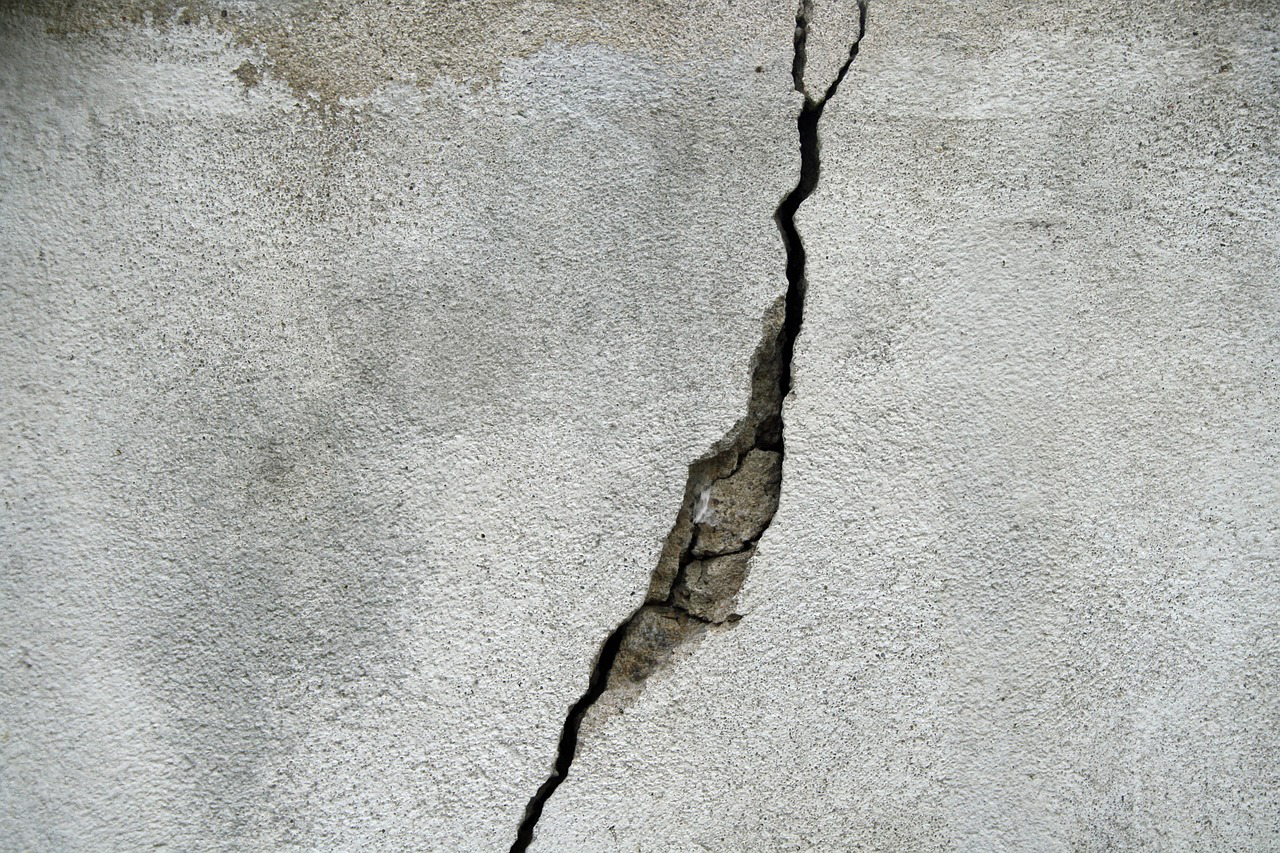

In [11]:
pic = image.open('C:/Users/user pc/Downloads/crack-695010_1280.jpg')
pic

In [12]:
classify(model,my_transforms,'C:/Users/user pc/Downloads/crack-695010_1280.jpg',classes )

POSITIVE


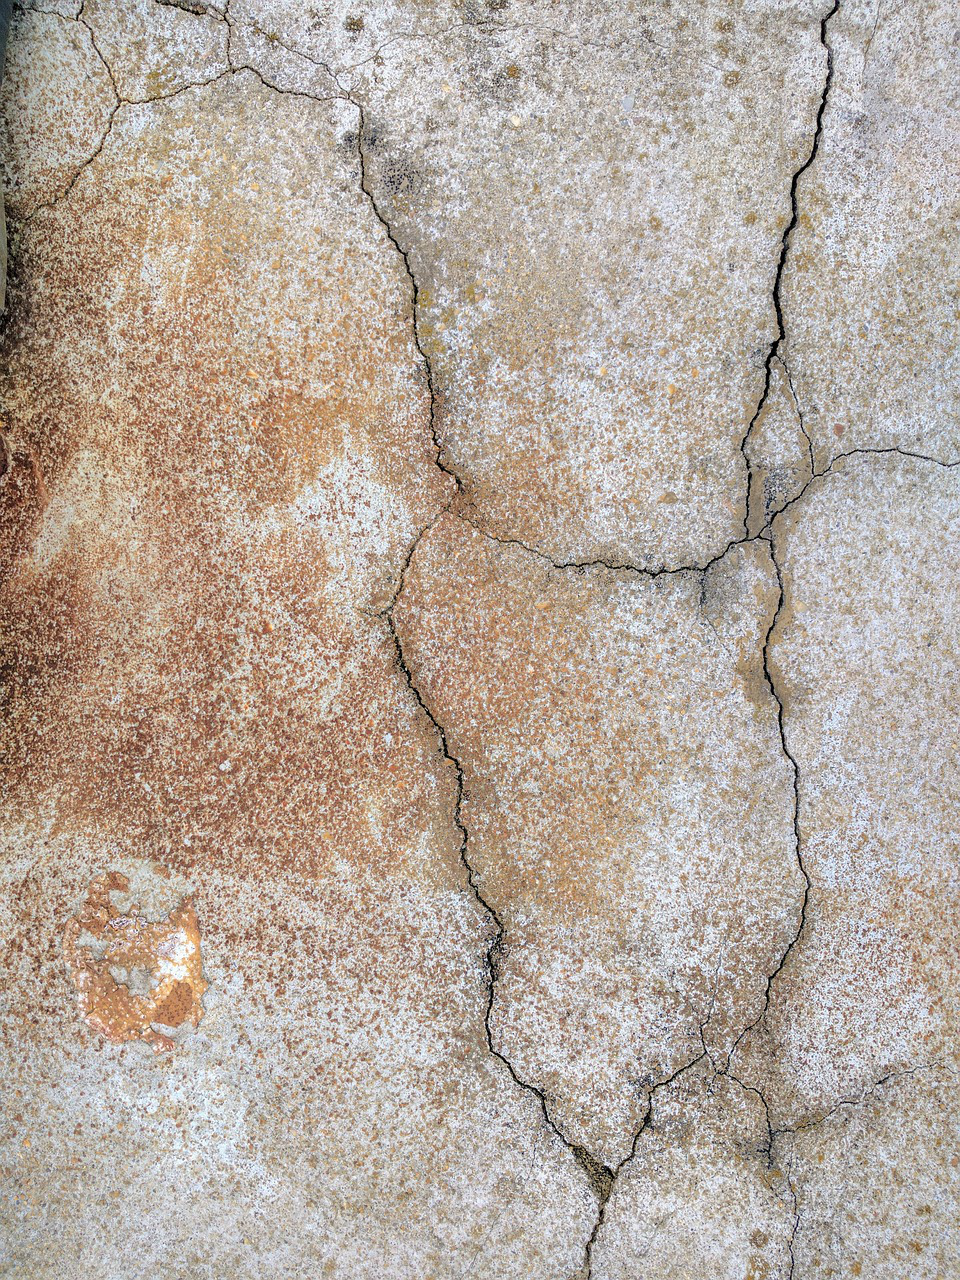

In [13]:
pic = image.open('C:/Users/user pc/Downloads/crack-2245770_1280.jpg')
pic

In [14]:
classify(model,my_transforms,'C:/Users/user pc/Downloads/crack-695010_1280.jpg',classes )

POSITIVE
